In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df = pd.read_csv("covid_19_clean_complete.csv", parse_dates=["Date"])
df.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [4]:
df.shape

(49068, 10)

In [5]:
df.drop("Province/State", axis=1, inplace=True)
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [6]:
# The "Date" column is set to DateTime because I parsed it as such while reading-in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   Confirmed       49068 non-null  int64         
 5   Deaths          49068 non-null  int64         
 6   Recovered       49068 non-null  int64         
 7   Active          49068 non-null  int64         
 8   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.4+ MB


In [7]:
# check to see if there are duplicate values
df_duplicate = df.duplicated().sum()
df_duplicate

0

In [8]:
# Calculate the Mortality and Recovery rate.
df["Mortality_rate"] = df["Deaths"]/df["Confirmed"]
df["Recovery_rate"] = df["Recovered"]/df["Confirmed"]
df.head(10), df.describe()

(        Country/Region       Lat        Long       Date  Confirmed  Deaths  \
 0          Afghanistan  33.93911   67.709953 2020-01-22          0       0   
 1              Albania  41.15330   20.168300 2020-01-22          0       0   
 2              Algeria  28.03390    1.659600 2020-01-22          0       0   
 3              Andorra  42.50630    1.521800 2020-01-22          0       0   
 4               Angola -11.20270   17.873900 2020-01-22          0       0   
 5  Antigua and Barbuda  17.06080  -61.796400 2020-01-22          0       0   
 6            Argentina -38.41610  -63.616700 2020-01-22          0       0   
 7              Armenia  40.06910   45.038200 2020-01-22          0       0   
 8            Australia -35.47350  149.012400 2020-01-22          0       0   
 9            Australia -33.86880  151.209300 2020-01-22          0       0   
 
    Recovered  Active             WHO Region  Mortality_rate  Recovery_rate  
 0          0       0  Eastern Mediterranean       

In [9]:
df.isnull().sum()

Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
Mortality_rate    10059
Recovery_rate     10059
dtype: int64

In [10]:
df = df.fillna(0)
df.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Mortality_rate,Recovery_rate
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0.0,0.0
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,0.0,0.0
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,0.0,0.0
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,0.0,0.0
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,0.0,0.0


In [11]:
df.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Mortality_rate,Recovery_rate
count,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04,49068.000000,49068.000000
mean,21.433730,23.528236,2020-04-24 12:00:00,1.688490e+04,884.179160,7.915713e+03,8.085012e+03,0.022255,0.377868
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01,0.000000,0.000000
25%,7.873054,-15.310100,2020-03-08 18:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,23.634500,21.745300,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01,0.007086,0.250000
75%,41.204380,80.771797,2020-06-10 06:00:00,1.518250e+03,30.000000,6.660000e+02,6.060000e+02,0.028957,0.779221
max,71.706900,178.065000,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,1.000000,1.001871
std,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04,0.040710,0.385593


In [12]:
# checking for negative values in the active column because we can tell from the description above that there aren't any in the "Confirmed"
# "Deaths" and "Recovered" columns
# Check for negative values in the Active column
negative_active_cases = df[df['Active'] < 0]

# Display the rows with negative Active cases, if any
print(f"Number of rows with negative 'Active' cases: {negative_active_cases.shape[0]}")
negative_active_cases.head(18)

Number of rows with negative 'Active' cases: 18


,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Mortality_rate,Recovery_rate
16238,China,19.195900,109.745300,2020-03-24,168,6,168,-6,Western Pacific,0.035714,1.000000
16499,China,19.195900,109.745300,2020-03-25,168,6,168,-6,Western Pacific,0.035714,1.000000
16760,China,19.195900,109.745300,2020-03-26,168,6,168,-6,Western Pacific,0.035714,1.000000
17021,China,19.195900,109.745300,2020-03-27,168,6,168,-6,Western Pacific,0.035714,1.000000
17282,China,19.195900,109.745300,2020-03-28,168,6,168,-6,Western Pacific,0.035714,1.000000
17543,China,19.195900,109.745300,2020-03-29,168,6,168,-6,Western Pacific,0.035714,1.000000
17804,China,19.195900,109.745300,2020-03-30,168,6,168,-6,Western Pacific,0.035714,1.000000
18065,China,19.195900,109.745300,2020-03-31,168,6,168,-6,Western Pacific,0.035714,1.000000
18326,China,19.195900,109.745300,2020-04-01,168,6,168,-6,Western Pacific,0.035714,1.000000
32059,United Kingdom,49.372300,-2.364400,2020-05-23,558,45,515,-2,Europe,0.080645,0.922939


In [13]:
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Mortality_rate,Recovery_rate
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0.000000,0.000000
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,0.000000,0.000000
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,0.000000,0.000000
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,0.000000,0.000000
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,0.016185,0.848555
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,0.285630,0.492608
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,0.019774,0.926554
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,0.008293,0.833172


In [14]:
num_c = df["Country/Region"].nunique()
print("There are entries from ", num_c, "countries in total")

There are entries from  187 countries in total


C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_16436\959751120.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Confirmed", y="Country/Region", data=top_countries, palette="viridis")


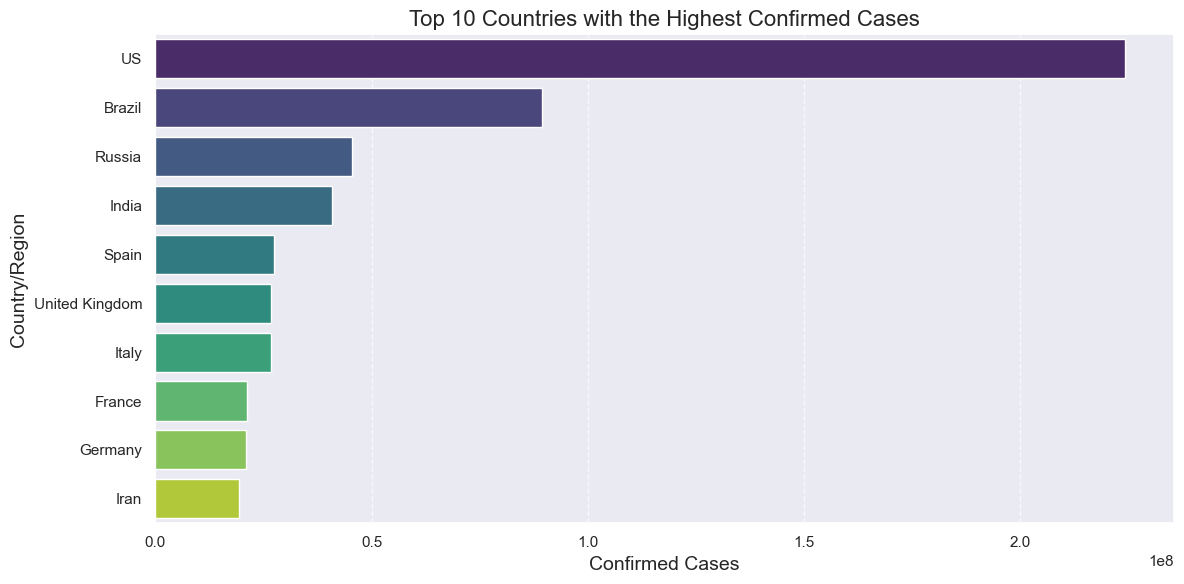

In [15]:
# Group by Country/Region and calculate the sum for specified columns
country_summary = df.groupby("Country/Region")[["Confirmed", "Deaths", "Recovered", "Active"]].sum().reset_index()

# Sort by Confirmed cases in descending order and select top 10
top_countries = country_summary.sort_values(by="Confirmed", ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x="Confirmed", y="Country/Region", data=top_countries, palette="viridis")
plt.title("Top 10 Countries with the Highest Confirmed Cases", fontsize=16)
plt.xlabel("Confirmed Cases", fontsize=14)
plt.ylabel("Country/Region", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
# Sort by Confirmed cases in descending order and select top 10 to show the figures alone
top_countries = country_summary.sort_values(by="Confirmed", ascending=False).head(10)
top_countries

,Country/Region,Confirmed,Deaths,Recovered,Active
173,US,224345948,11011411,56353416,156981121
23,Brazil,89524967,3938034,54492873,31094060
138,Russia,45408411,619385,25120448,19668578
79,India,40883464,1111831,23783720,15987913
157,Spain,27404045,3033030,15093583,9277432
177,United Kingdom,26748587,3997775,126217,22624595
85,Italy,26745145,3707717,15673910,7363518
61,France,21210926,3048524,7182115,10980287
65,Germany,21059152,871322,17107839,3079991
81,Iran,19339267,1024136,15200895,3114236


In [17]:
bottom_countries = country_summary.sort_values(by="Confirmed", ascending=False).tail(10)
bottom_countries

,Country/Region,Confirmed,Deaths,Recovered,Active
69,Grenada,2466,0,1848,618
59,Fiji,2266,0,1568,698
141,Saint Lucia,2236,0,1860,376
94,Laos,2229,0,1540,689
49,Dominica,2059,0,1659,400
140,Saint Kitts and Nevis,1772,0,1295,477
68,Greenland,1507,0,1372,135
75,Holy See,1356,0,742,614
130,Papua New Guinea,1185,2,695,488
183,Western Sahara,901,63,648,190


## Visualise the affected WHO Region

In [19]:
df["WHO Region"].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [20]:
# Group by 'WHO Region' and sum the 'Confirmed' cases
region_summary = df.groupby('WHO Region')['Confirmed'].sum().reset_index()

# Sort the results by total 'Confirmed' cases, descending
region_summary = region_summary.sort_values(by='Confirmed', ascending=False)

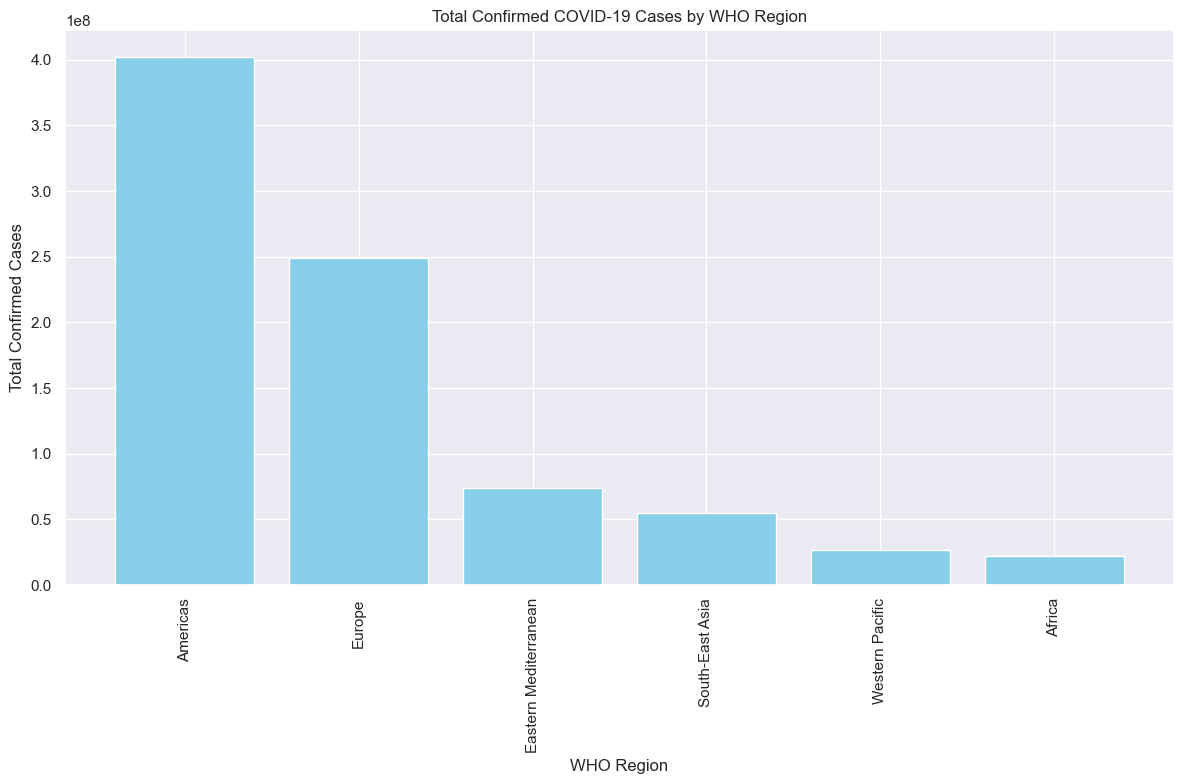

In [21]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.bar(region_summary['WHO Region'], region_summary['Confirmed'], color='skyblue')

# Add labels and title
plt.xlabel('WHO Region')
plt.ylabel('Total Confirmed Cases')
plt.title('Total Confirmed COVID-19 Cases by WHO Region')
plt.xticks(rotation=90)  # Rotate region names if they overlap

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   Confirmed       49068 non-null  int64         
 5   Deaths          49068 non-null  int64         
 6   Recovered       49068 non-null  int64         
 7   Active          49068 non-null  int64         
 8   WHO Region      49068 non-null  object        
 9   Mortality_rate  49068 non-null  float64       
 10  Recovery_rate   49068 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 4.1+ MB


In [23]:
# Calculate Mortality_rate and Recovery_rate for each entry
df['Mortality_rate'] = (df['Deaths'] / df['Confirmed']) * 100
df['Recovery_rate'] = (df['Recovered'] / df['Confirmed']) * 100

In [24]:
# Group by 'WHO Region' and 'Date' and aggregate the necessary columns
region_daily = df.groupby(['WHO Region', 'Date']).agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum'
}).reset_index()

# Calculate Mortality_rate and Recovery_rate for each group
region_daily['Mortality_rate'] = (region_daily['Deaths'] / region_daily['Confirmed']) * 100
region_daily['Recovery_rate'] = (region_daily['Recovered'] / region_daily['Confirmed']) * 100


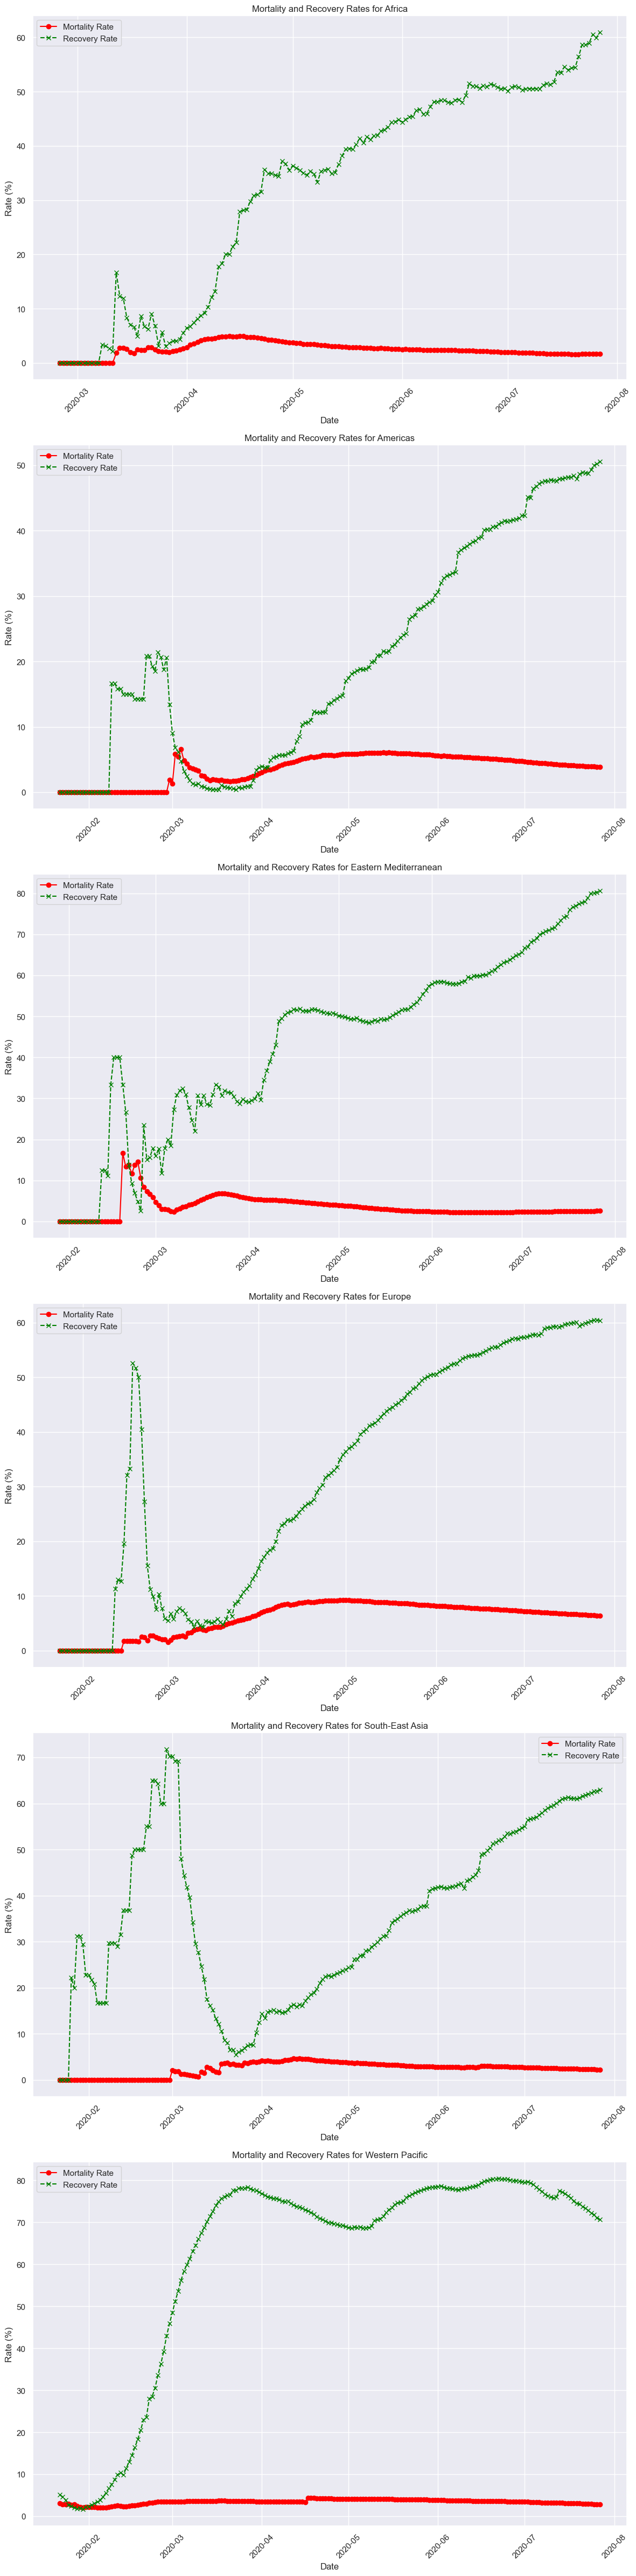

In [25]:
# Get the list of unique WHO Regions
regions = region_daily['WHO Region'].unique()

# Set up the figure with subplots: One subplot for each region
fig, axes = plt.subplots(len(regions), 1, figsize=(12, 8 * len(regions)))

# If there's only one subplot (i.e., one region), axes might not be an array, so we handle it conditionally
if len(regions) == 1:
    axes = [axes]

# Loop through each region and plot the data in the corresponding subplot
for ax, region in zip(axes, regions):
    # Filter the data for the current region
    region_data = region_daily[region_daily['WHO Region'] == region]
    
    # Plot Mortality_rate and Recovery_rate for the region
    ax.plot(region_data['Date'], region_data['Mortality_rate'], label='Mortality Rate', color='red', linestyle='-', marker='o')
    ax.plot(region_data['Date'], region_data['Recovery_rate'], label='Recovery Rate', color='green', linestyle='--', marker='x')
    
    # Add labels and title for the subplot
    ax.set_title(f'Mortality and Recovery Rates for {region}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Rate (%)')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    ax.legend()

# Adjust layout to avoid overlap of plots
plt.tight_layout()
plt.show()


### From the charts above you can infer that there is a strong correlation between the number of cases that result in "Deaths" and the ones where the patient "Recovered"

                     Lat      Long  Confirmed    Deaths  Recovered    Active  \
Lat             1.000000 -0.127259   0.036665  0.070040   0.015329  0.044392   
Long           -0.127259  1.000000  -0.078911 -0.101340  -0.052391 -0.085688   
Confirmed       0.036665 -0.078911   1.000000  0.912361   0.895506  0.950255   
Deaths          0.070040 -0.101340   0.912361  1.000000   0.763090  0.891858   
Recovered       0.015329 -0.052391   0.895506  0.763090   1.000000  0.713088   
Active          0.044392 -0.085688   0.950255  0.891858   0.713088  1.000000   
Mortality_rate  0.053879 -0.232708   0.082843  0.195646   0.067607  0.073474   
Recovery_rate  -0.028481  0.278826  -0.002585 -0.025713   0.059027 -0.044549   

                Mortality_rate  Recovery_rate  
Lat                   0.053879      -0.028481  
Long                 -0.232708       0.278826  
Confirmed             0.082843      -0.002585  
Deaths                0.195646      -0.025713  
Recovered             0.067607       0.

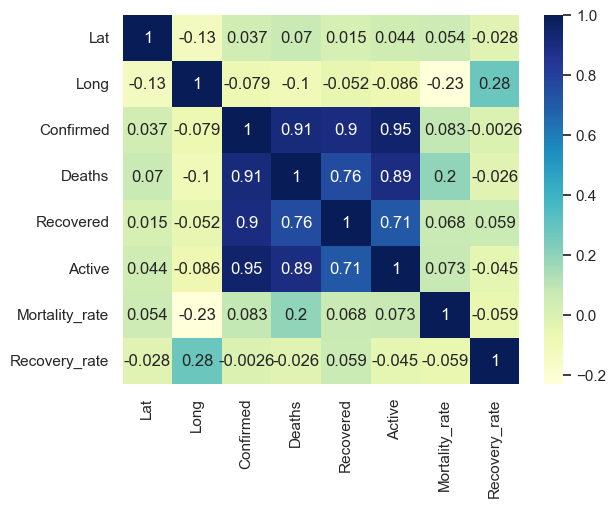

In [27]:
# Print the correlation values
print(df.corr(numeric_only=True))

# Plotting correlation heatmap
dataplot = sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)

# Displaying heatmap
plt.show()

In [28]:
# A correlation value of 0.76 indicates a "Very Strong Correlation" and proves our initial hypothesis

## Time-Series Forecast of the Possible Future Trend for "Confirmed", "Deaths", "Recovered", and "Active" cases

### Step 1: Preprocess the Data

In [31]:
# Aggregate data by Date
time_series = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# Set Date as the index for time-series modeling
time_series.set_index('Date', inplace=True)


### Step 2: Visualise the data

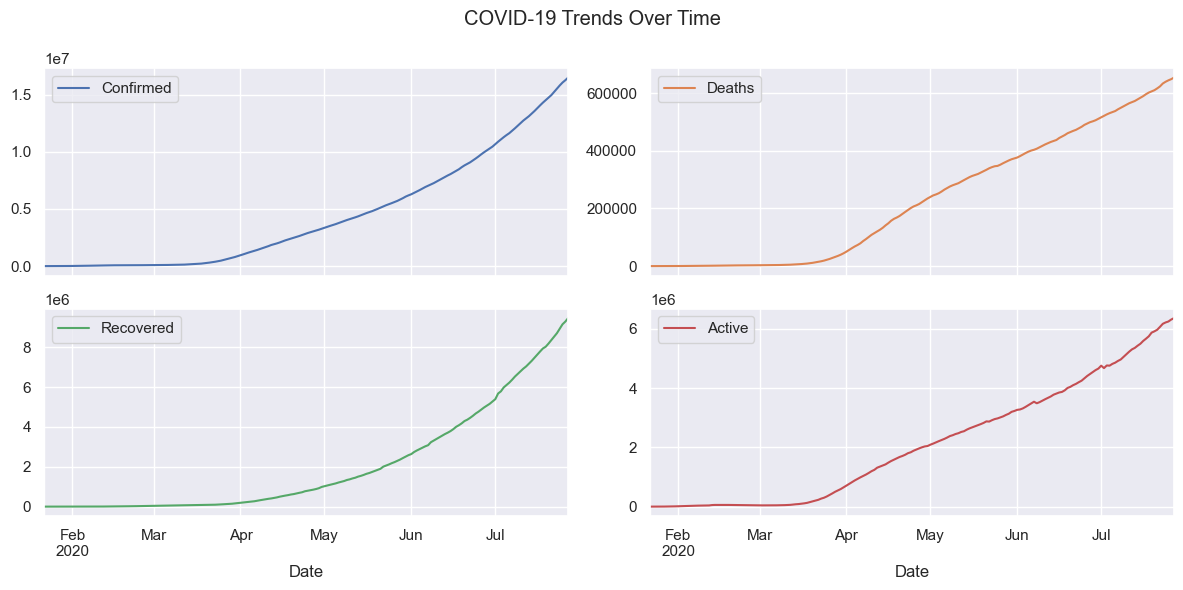

In [33]:
# Plot the time series
time_series.plot(figsize=(12, 6), subplots=True, layout=(2, 2), title="COVID-19 Trends Over Time")
plt.tight_layout()
plt.show()

### Step 3: Choose a Forecasting Method

In [35]:
# Using SARIMA Forecasting Method

C:\Users\HP EliteBook\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP EliteBook\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


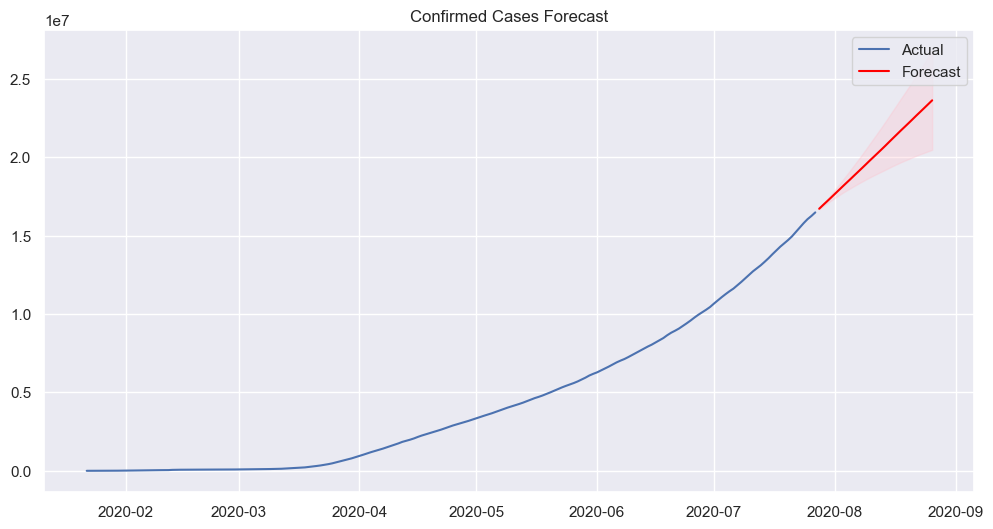

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Forecast for "Confirmed" cases (repeat for other columns)
model = SARIMAX(time_series['Confirmed'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast
forecast = results.get_forecast(steps=30)  # Predict the next 30 days
forecast_df = forecast.summary_frame()

# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(time_series['Confirmed'], label="Actual")
plt.plot(forecast_df['mean'], label="Forecast", color='red')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.title("Confirmed Cases Forecast")
plt.legend()
plt.show()


In [37]:
# Evaluate the Model for the "Confirmed" cases forecast before proceeding with the remaining target columns

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


actual = time_series['Confirmed'][-30:]
predicted = forecast_df['mean'][:30]
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 7031262.497418762, RMSE: 7033547.344750976


In [39]:
# check for the relative mean square error and relative absolute error

In [40]:
max_cases = time_series['Confirmed'].max()
relative_error_mae = (7031262 / max_cases) * 100
relative_error_rmse = (7033547 / max_cases) * 100

print(f"Relative MAE: {relative_error_mae:.2f}%")
print(f"Relative RMSE: {relative_error_rmse:.2f}%")

Relative MAE: 42.66%
Relative RMSE: 42.68%


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(time_series['Confirmed'][-30:], forecast_df['mean'][:30])
print(f"R²: {r2:.2f}")

R²: -12.53


In [93]:
# Load the dataset
data = pd.read_csv("covid_19_clean_complete.csv", parse_dates=["Date"])

# Display the first few rows and column information
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


(  Province/State Country/Region       Lat       Long       Date  Confirmed  \
 0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
 1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
 2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
 3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
 4            NaN         Angola -11.20270  17.873900 2020-01-22          0   
 
    Deaths  Recovered  Active             WHO Region  
 0       0          0       0  Eastern Mediterranean  
 1       0          0       0                 Europe  
 2       0          0       0                 Africa  
 3       0          0       0                 Europe  
 4       0          0       0                 Africa  ,
 None)

In [95]:
# Focus on relevant columns
data_subset = data[['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active']]

# Convert 'Date' to datetime format
data_subset['Date'] = pd.to_datetime(data_subset['Date'])

# Aggregate data by date to remove geographic granularity
data_aggregated = data_subset.groupby('Date').sum().reset_index()

# Check the structure of the processed data
data_aggregated.head(), data_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       188 non-null    datetime64[ns]
 1   Confirmed  188 non-null    int64         
 2   Deaths     188 non-null    int64         
 3   Recovered  188 non-null    int64         
 4   Active     188 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 7.5 KB


C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_16436\1268803046.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Date'] = pd.to_datetime(data_subset['Date'])


(        Date  Confirmed  Deaths  Recovered  Active
 0 2020-01-22        555      17         28     510
 1 2020-01-23        654      18         30     606
 2 2020-01-24        941      26         36     879
 3 2020-01-25       1434      42         39    1353
 4 2020-01-26       2118      56         52    2010,
 None)

In [97]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the target variables (Confirmed, Deaths, Recovered, Active)
scaled_data = scaler.fit_transform(data_aggregated[['Confirmed', 'Deaths', 'Recovered', 'Active']])

# Convert scaled data back into a DataFrame for better handling
scaled_df = pd.DataFrame(scaled_data, columns=['Confirmed', 'Deaths', 'Recovered', 'Active'])
scaled_df['Date'] = data_aggregated['Date']

# Inspect the scaled data
scaled_df.head()

,Confirmed,Deaths,Recovered,Active,Date
0,0.000000,0.000000,0.000000e+00,0.000000,2020-01-22
1,0.000006,0.000002,2.112365e-07,0.000015,2020-01-23
2,0.000023,0.000014,8.449461e-07,0.000058,2020-01-24
3,0.000053,0.000038,1.161801e-06,0.000133,2020-01-25
4,0.000095,0.000060,2.534838e-06,0.000236,2020-01-26


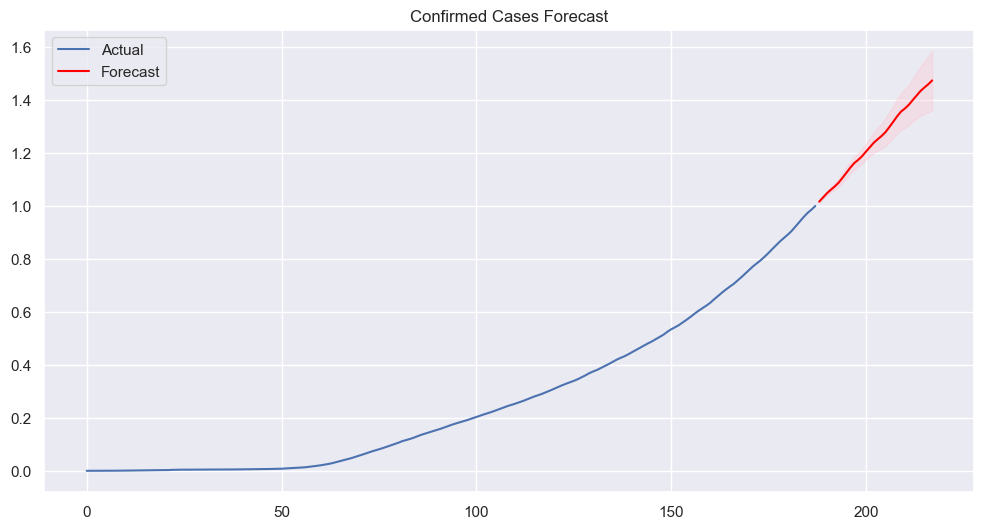

In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Forecast for "Confirmed" cases (repeat for other columns)
model = SARIMAX(scaled_df['Confirmed'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast
forecast = results.get_forecast(steps=30)  # Predict the next 30 days
forecast_df = forecast.summary_frame()

# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(scaled_df['Confirmed'], label="Actual")
plt.plot(forecast_df['mean'], label="Forecast", color='red')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.title("Confirmed Cases Forecast")
plt.legend()
plt.show()


In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute metrics
mse = mean_squared_error(scaled_df['Confirmed'][-30:], forecast_df['mean'][:30])
mae = mean_absolute_error(scaled_df['Confirmed'][-30:], forecast_df['mean'][:30])
rmse = mse ** 0.5
mape = np.mean(np.abs((scaled_df['Confirmed'][-30:] - forecast_df['mean'][:30]) / scaled_df['Confirmed'][-30:])) * 100
r2 = r2_score(scaled_df['Confirmed'][-30:], forecast_df['mean'][:30])

# Print metrics
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.2f}")

MSE: 0.20
MAE: 0.45
RMSE: 0.45
MAPE: nan%
R²: -14.06


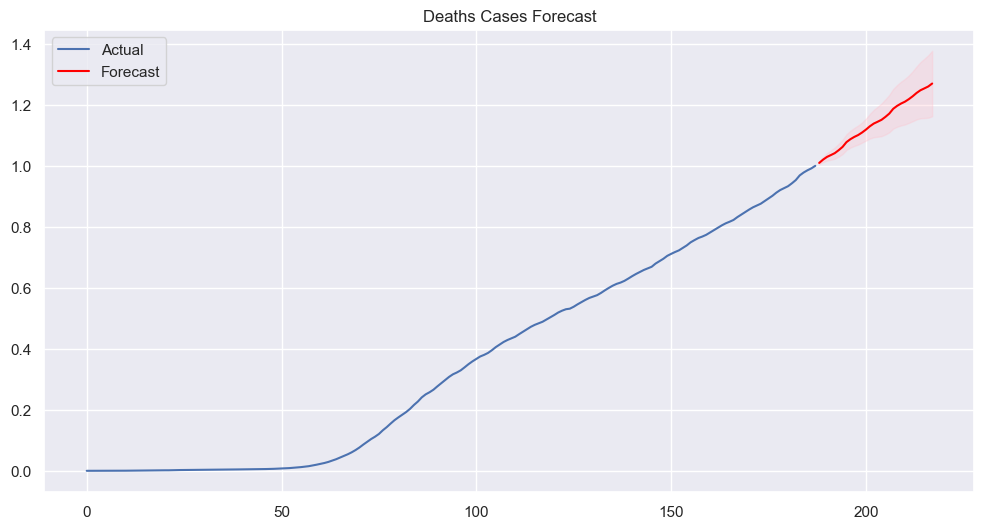

In [103]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Forecast for "Confirmed" cases (repeat for other columns)
model = SARIMAX(scaled_df['Deaths'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast
forecast = results.get_forecast(steps=30)  # Predict the next 30 days
forecast_df = forecast.summary_frame()

# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(scaled_df['Deaths'], label="Actual")
plt.plot(forecast_df['mean'], label="Forecast", color='red')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.title("Deaths Cases Forecast")
plt.legend()
plt.show()

C:\Users\HP EliteBook\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


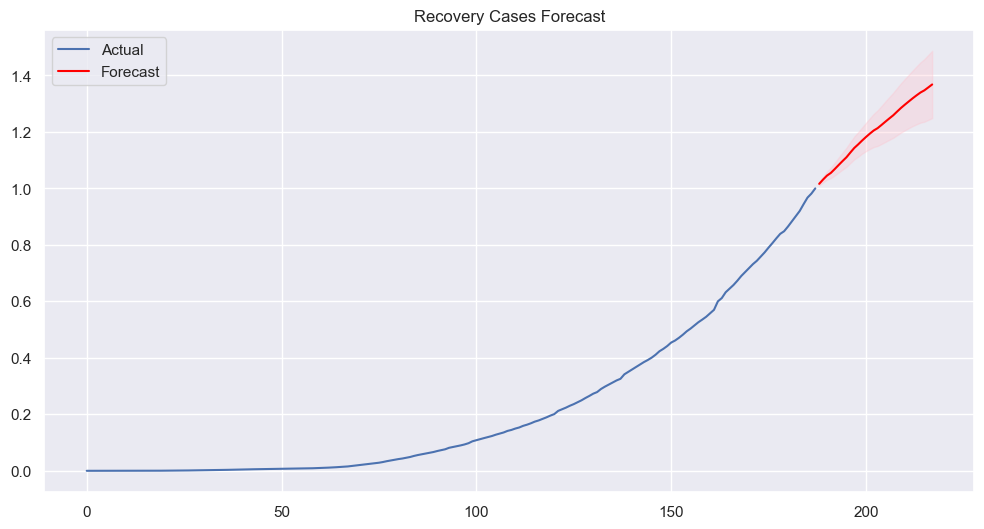

In [105]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Forecast for "Confirmed" cases (repeat for other columns)
model = SARIMAX(scaled_df['Recovered'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast
forecast = results.get_forecast(steps=30)  # Predict the next 30 days
forecast_df = forecast.summary_frame()

# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(scaled_df['Recovered'], label="Actual")
plt.plot(forecast_df['mean'], label="Forecast", color='red')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.title("Recovery Cases Forecast")
plt.legend()
plt.show()

C:\Users\HP EliteBook\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


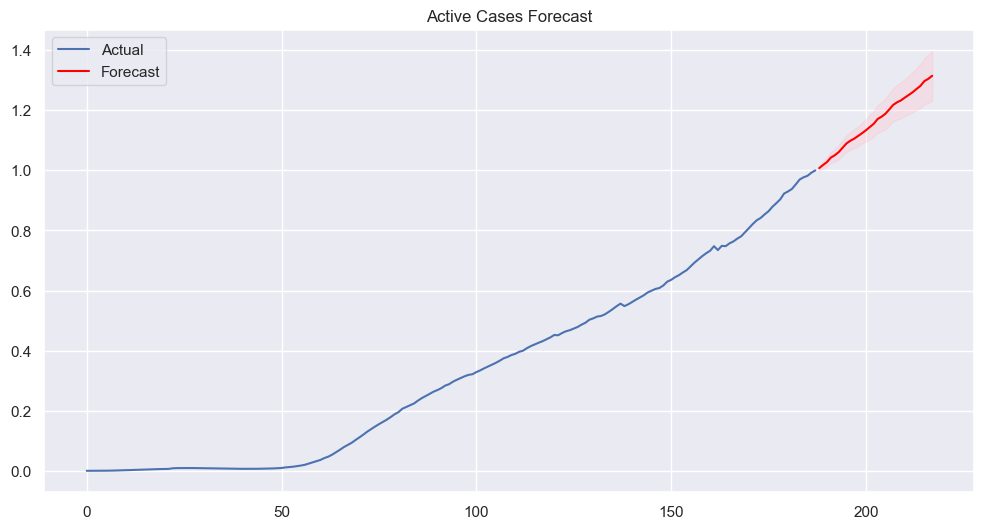

In [107]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Forecast for "Confirmed" cases (repeat for other columns)
model = SARIMAX(scaled_df['Active'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast
forecast = results.get_forecast(steps=30)  # Predict the next 30 days
forecast_df = forecast.summary_frame()

# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(scaled_df['Active'], label="Actual")
plt.plot(forecast_df['mean'], label="Forecast", color='red')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.title("Active Cases Forecast")
plt.legend()
plt.show()